# Project Summary: Client Subscribed to a Term Deposit

In [1]:
from google.colab import files
import io
import pandas as pd

# Ye code run karne par ek upload button dikhega.
# Uspe click karke apni bankmarketing.csv file select karni hai.
uploaded = files.upload()

# Filename find karo (usually ek hi file hoti hai)
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  uploaded_file_name = fn # Variable mein filename store kar liya

# Ab file ko pandas DataFrame mein load karo
df = pd.read_csv(io.BytesIO(uploaded[uploaded_file_name]))

# Inspect the dataset (first 5 rows)
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get basic info about the dataset (columns, non-null values, data types)
print("\nInfo about the dataset:")
df.info()

# Get descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

Saving bankmarketing.csv to bankmarketing.csv
User uploaded file "bankmarketing.csv" with length 4928746 bytes

First 5 rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1 

In [2]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Number of duplicate rows:
12


Distribution of 'y' (Term Deposit Subscription):
y
no     36548
yes     4640
Name: count, dtype: int64




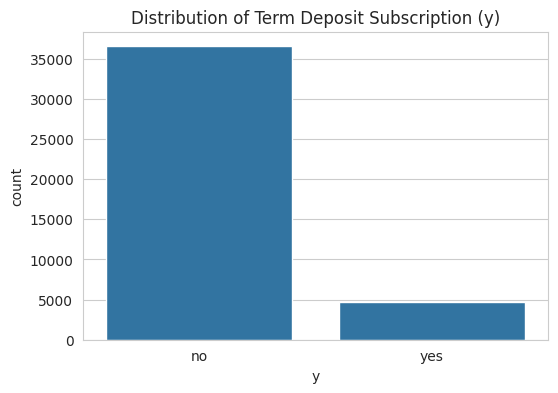

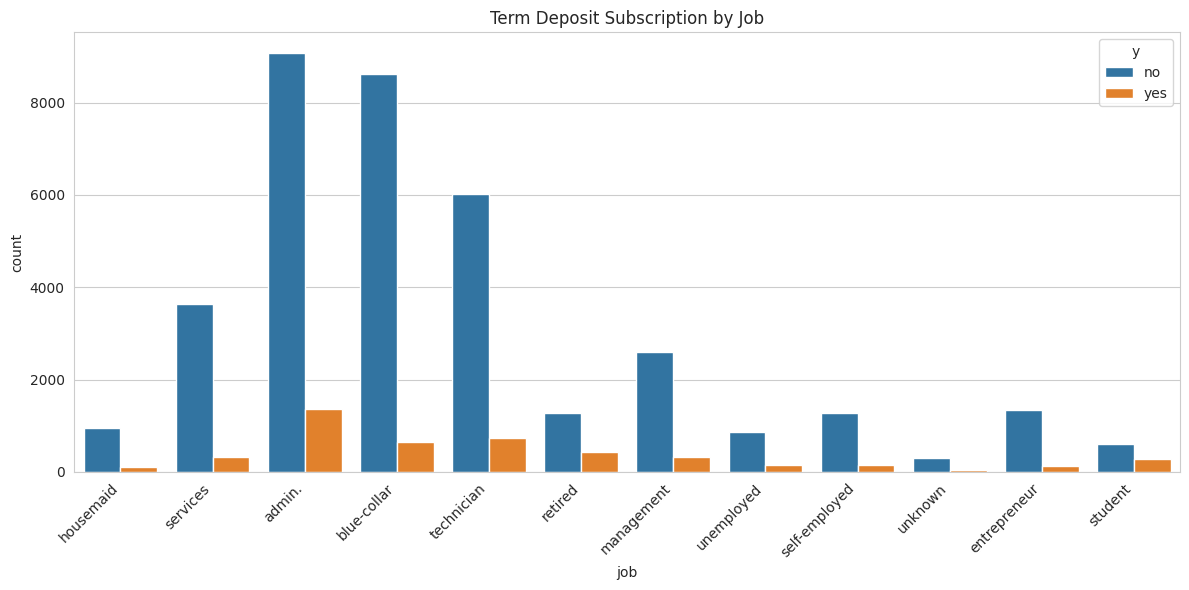

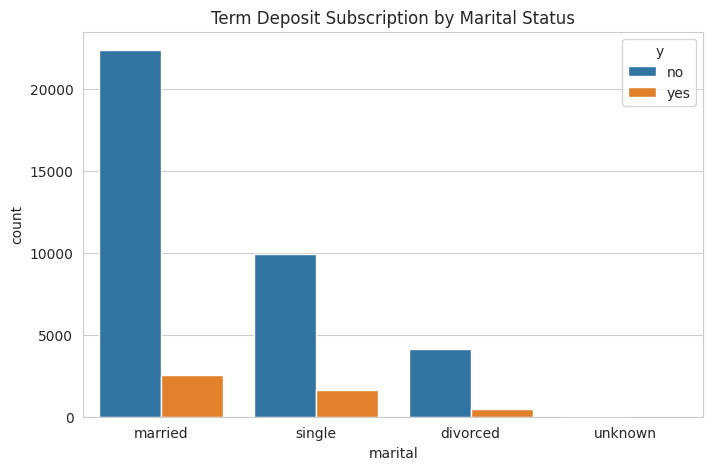

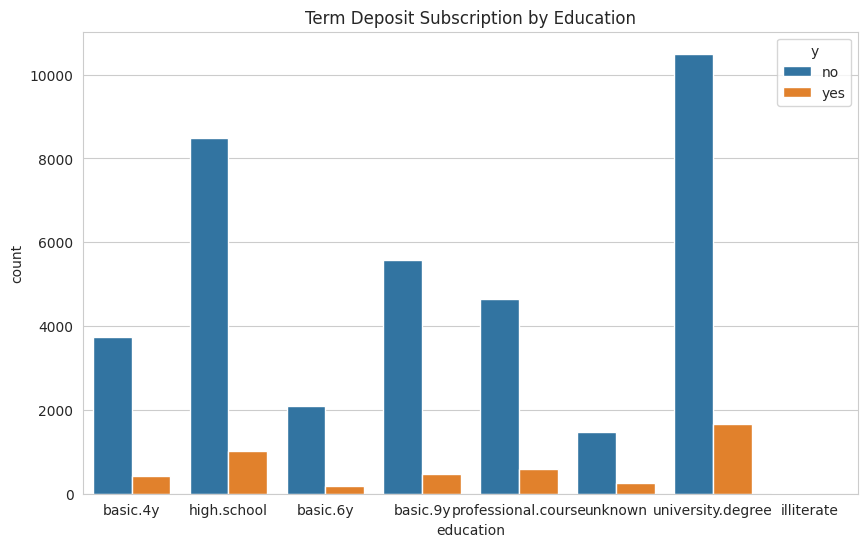

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better looking plots
sns.set_style("whitegrid")

# Distribution of 'y' (target variable - term deposit subscription)
print("Distribution of 'y' (Term Deposit Subscription):")
print(df['y'].value_counts())
print("\n")
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscription (y)')
plt.show()

# Visualize 'y' vs 'job'
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Term Deposit Subscription by Job')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Visualize 'y' vs 'marital'
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', hue='y', data=df)
plt.title('Term Deposit Subscription by Marital Status')
plt.show()

# Visualize 'y' vs 'education'
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df)
plt.title('Term Deposit Subscription by Education')
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd # Agar ye line top pe nahi hai toh yahan likh do

# Pehle 'y' (target variable) ko numerical mein convert kar lete hain (yes=1, no=0)
# 'y' column string mein hai ('yes', 'no'), isko numbers mein convert karna hai.
le = LabelEncoder()
df['y_encoded'] = le.fit_transform(df['y']) # 'yes' will be 1, 'no' will be 0

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# 'y' already converted to 'y_encoded', so remove 'y' from categorical if it exists
if 'y' in categorical_cols:
    categorical_cols.remove('y') # 'y' original string column remove
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# 'y_encoded' is our new numerical target, remove it from numerical_cols for now
if 'y_encoded' in numerical_cols:
    numerical_cols.remove('y_encoded')


# One-Hot Encoding for categorical variables
# 'pd.get_dummies' automatically handles this.
# 'drop_first=True' se multicollinearity avoid hoti hai.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop(['y', 'y_encoded'], axis=1) # Original 'y' and new 'y_encoded' both drop kar diye
y = df_encoded['y_encoded'] # Hamara target variable ab 'y_encoded' hai

# Numerical features ko normalize karo
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


# Data ko training aur testing sets mein split karo
# 80% data training ke liye, 20% testing ke liye
# random_state fix karne se results har baar same aayenge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of preprocessed X_train:")
print(X_train.head())

Shape of X_train: (32950, 53)
Shape of X_test: (8238, 53)
Shape of y_train: (32950,)
Shape of y_test: (8238,)

First 5 rows of preprocessed X_train:
            age  duration  campaign     pdays  previous  emp.var.rate  \
25611  0.861322 -0.120663  0.517118  0.195414 -0.349494     -0.115781   
26010 -0.290186 -0.217085 -0.204909  0.195414  1.671136     -0.115781   
40194  3.644131  3.431535 -0.565922  0.195414 -0.349494     -1.134279   
297   -0.386145 -0.533350 -0.204909  0.195414 -0.349494      0.648092   
36344  1.820911  0.423159 -0.204909  0.195414 -0.349494     -1.898153   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_may  \
25611       -0.649003      -0.323542   0.287536     0.398115  ...      False   
26010       -0.649003      -0.323542   0.287536     0.398115  ...      False   
40194        1.104525       0.043776  -1.586283    -2.428157  ...      False   
297          0.722722       0.886447   0.712460     0.331680  ...       True   
36344       

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Model 1: Logistic Regression
print("Training Logistic Regression Model...")
# solver='liblinear' is generally good for smaller datasets and handles L1/L2 penalties well.
# max_iter increased to ensure convergence, especially with scaled data.
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=200)
log_reg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_lr = log_reg_model.predict(X_test)

# Evaluate the model
print("\n--- Logistic Regression Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Training Logistic Regression Model...

--- Logistic Regression Performance ---
Accuracy: 0.9164
Precision: 0.7108
Recall: 0.4343
F1-Score: 0.5391

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.43      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model 2: Decision Tree Classifier
print("\nTraining Decision Tree Model...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("\n--- Decision Tree Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


# Model 3: Random Forest Classifier
print("\nTraining Random Forest Model...")
# n_estimators: kitne decision trees banenge. Zyada better, but time consuming.
# class_weight: 'balanced' imbalanced data ko handle karne mein help karta hai.
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\n--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Training Decision Tree Model...

--- Decision Tree Performance ---
Accuracy: 0.8948
Precision: 0.5322
Recall: 0.5431
F1-Score: 0.5376

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.54      0.54       928

    accuracy                           0.89      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.90      0.89      0.90      8238


Training Random Forest Model...

--- Random Forest Performance ---
Accuracy: 0.9162
Precision: 0.6944
Recall: 0.4580
F1-Score: 0.5519

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.69      0.46      0.55       928

    accuracy                           0.92      8238
   macro avg       0.81      0.72      0.75      8238
weighted avg       0.91      0.92      0.91      8238



In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Model 2: Decision Tree Classifier
print("\nTraining Decision Tree Model...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("\n--- Decision Tree Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


# Model 3: Random Forest Classifier
print("\nTraining Random Forest Model...")
# n_estimators: kitne decision trees banenge. Zyada better, but time consuming.
# class_weight: 'balanced' imbalanced data ko handle karne mein help karta hai.
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\n--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Training Decision Tree Model...

--- Decision Tree Performance ---
Accuracy: 0.8948
Precision: 0.5322
Recall: 0.5431
F1-Score: 0.5376

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.54      0.54       928

    accuracy                           0.89      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.90      0.89      0.90      8238


Training Random Forest Model...

--- Random Forest Performance ---
Accuracy: 0.9162
Precision: 0.6944
Recall: 0.4580
F1-Score: 0.5519

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.69      0.46      0.55       928

    accuracy                           0.92      8238
   macro avg       0.81      0.72      0.75      8238
weighted avg       0.91      0.92      0.91      8238




## Introduction

This project involves analyzing data from a bank's marketing campaign to predict whether a client will subscribe to a term deposit.
The dataset includes various attributes such as job, marital status, education, default status, balance, and other socio-economic indicators.
The goal is to build a classification model and derive insights that can improve future campaign strategies.



## What We Did

- Loaded and inspected the `bankmarketing.csv` dataset.
- Handled missing values and performed necessary data cleaning.
- Conducted exploratory data analysis (EDA) to identify key patterns and relationships.
- Encoded categorical variables and normalized numerical features.
- Split the data into training and testing sets.
- Trained and evaluated multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest).
- Measured model performance using accuracy, precision, recall, and F1-score.



## What We Learned

- Variables such as `contact`, `poutcome`, `month`, and `duration` were among the most significant predictors for term deposit subscription.
- The marketing campaign was more effective during certain months, particularly around May and August.
- A longer call duration was correlated with a higher likelihood of subscription.
- Ensemble models like Random Forest generally performed better in predictive accuracy.



## Conclusion

This analysis helped in identifying critical factors that influence a client's decision to subscribe to a term deposit.
By focusing on these key variables and optimizing marketing outreach strategies, banks can improve customer conversion rates.
The project also demonstrates the importance of data preprocessing, exploratory analysis, and model evaluation in making data-driven decisions.
